# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
import numpy as np
# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [2]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep = "\t")

In [3]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Step 4. See the first 10 entries

In [4]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

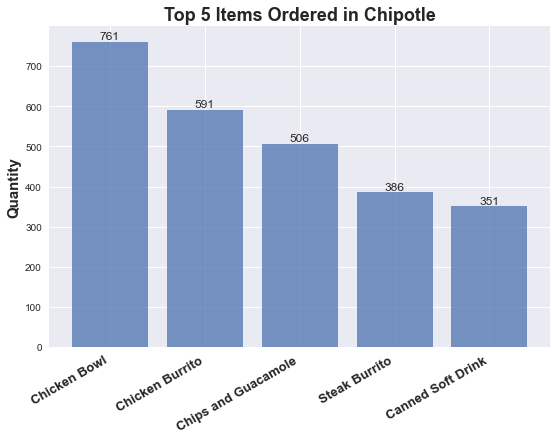

In [180]:
# set plot style
plt.style.use('seaborn')
name_grp = chipo.groupby(["item_name"])
# find top 5 sell items name, reset index
top_5 = name_grp["quantity"].sum().nlargest(5).reset_index()

# set bar chart data
bought_x = top_5["item_name"]
bought_y = top_5["quantity"]

#bar plot
bars = plt.bar(bought_x, bought_y, alpha = 0.75)

# add values on bars, padding is distance from bars
plt.bar_label(container = bars, labels = bought_y, padding = 0.5, fontsize = 12,)

# add title
# plt.xlabel("Item_name", fontsize = 16)
plt.ylabel("Quantity", fontsize = 15,fontweight = "bold")
plt.title("Top 5 Items Ordered in Chipotle", fontsize = 18, fontweight = "bold")

# adjust x axis label angle to better show, ha is horizonatal-alignment
plt.xticks(rotation = 30, ha = "right", fontsize = 13, fontweight = "bold")


#plt.tight_layout()
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

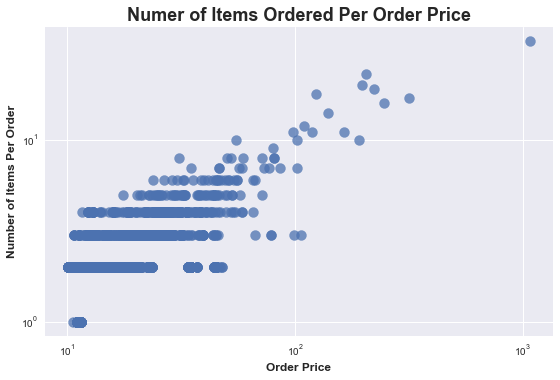

In [140]:
### x as total order price, as note, delete when submit
plt.style.use('seaborn')
# get rid of non-numeric signs of item_price
chipo["item_price_f"] = chipo["item_price"].apply(lambda x : re.sub("[^-.0-9]", "", x)) # substitute anything no - . 0-9

#convert to float
chipo["item_price_f"] = chipo["item_price_f"].astype(float)

# total cost per item per order
chipo["item_sub"] = chipo["item_price_f"] * chipo["quantity"] 

# groupby order id
orders = chipo.groupby(by = ["order_id"])
# total quatity and totoal order price per order
order_info = orders[["quantity", "item_sub"] ].sum().reset_index()

#plot data
x = order_info["item_sub"] # order price
y = order_info["quantity"] # number

# scatter plot, dot size, edge color, 
# alpha is how transparent it is
plt.scatter(x,y,s = 100, alpha = 0.75)


# use log scale to make outliner less effective
plt.xscale("log")
plt.yscale("log")

plt.title('Numer of Items Ordered Per Order Price', fontsize = 18, fontweight = "bold")
plt.xlabel('Order Price', fontsize = 12, fontweight = "bold")
plt.ylabel('Number of Items Per Order', fontsize = 12, fontweight = "bold")

plt.tight_layout()
plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.

In [150]:
order_info.shape


(1834, 3)

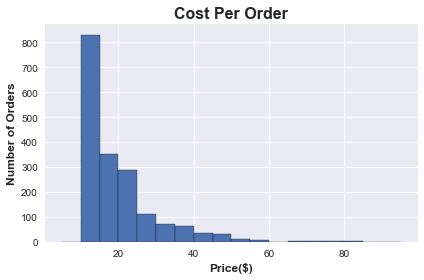

In [157]:
# histogram of per order price?

price = order_info["item_sub"] # order price
bins = np.arange(5, 100, 5)

plt.hist(price, bins = bins, edgecolor = "black")

plt.title('Cost Per Order', fontsize = 16, fontweight = "bold")
plt.xlabel('Price($)',fontsize = 12, fontweight = "bold")
plt.ylabel('Number of Orders',fontsize = 12, fontweight = "bold")

plt.tight_layout()

plt.show()